In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys
sys.path.append('/home/hrai/codes/hpe_library/')
from lib_import import *
from my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
h36m_3d_world, h36m_cam_param = load_h36m()

==> Loading 3D data wrt World CS...


In [8]:
h36m_3d_world._data.keys()

dict_keys(['S1', 'S5', 'S6', 'S7', 'S8', 'S9', 'S11'])

In [9]:
h36m_3d_world._data['S5'].keys()

dict_keys(['Waiting 1', 'Sitting', 'Waiting 2', 'Smoking', 'WalkTogether 1', 'Discussion 2', 'Greeting 1', 'Directions 2', 'Phoning', 'Phoning 1', 'Smoking 1', 'Greeting 2', 'WalkTogether', 'Sitting 1', 'SittingDown', 'SittingDown 1', 'Discussion 3', 'Directions 1', 'Purchases', 'Walking 1', 'WalkDog 1', 'Walking', 'Eating', 'Photo 2', 'Posing', 'Posing 1', 'WalkDog', 'Photo', 'Purchases 1', 'Eating 1'])

In [10]:
h36m_3d_world._data['S5']['Waiting 1'].keys()

dict_keys(['positions', 'cameras'])

In [11]:
h36m_3d_world._data['S5']['Waiting 1']['positions'].shape

(4517, 17, 3)

In [12]:
save_folder = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_train_pkl'
if not os.path.exists(save_folder): os.makedirs(save_folder)

In [15]:
for subject in ['S9', 'S11']: #['S1', 'S5', 'S6', 'S7', 'S8']:
    action_list = h36m_3d_world._data[subject].keys()
    for action in action_list:
        pose3d_list_h36m = h36m_3d_world._data[subject][action]['positions']
        cam_info = h36m_3d_world._data[subject][action]['cameras']
        cam_param = get_cam_param(cam_info, subject, h36m_cam_param)
        for camera_id in cam_param.keys():
            print(subject, action, camera_id)
            #print(cam_param[cam_id])
            calibration_matrix = np.array(cam_param[camera_id]['int']['calibration_matrix'])
            R = cam_param[camera_id]['ext']['R']
            t = np.array(cam_param[camera_id]['ext']['t'])/1000
            camera_param = {
                'intrinsic': calibration_matrix,
                'extrinsic': np.concatenate([R, t.reshape(3, 1)], axis=1),
            }
            #print(camera_param)
            available_frames = list(range(len(pose3d_list_h36m)))
            generate_kookmin_pkl_for_each_video(pose3d_list=pose3d_list_h36m.copy(), 
                                                available_frames=available_frames.copy(), 
                                                subject=subject, 
                                                camera_id=camera_id, 
                                                action=action, 
                                                phase='', 
                                                camera_param=camera_param.copy(), 
                                                save_folder=save_folder, 
                                                trans=None, 
                                                rot=None, 
                                                centered_root=False, # True: root joint을 (0, 0, 0)으로 이동, False: 원래 위치
                                                overwrite=False)
        
            

S9 Waiting 1 54138969


100%|██████████| 1612/1612 [00:19<00:00, 82.26it/s] 


S9 Waiting 1 55011271


100%|██████████| 1612/1612 [00:21<00:00, 75.58it/s]


S9 Waiting 1 58860488


100%|██████████| 1612/1612 [00:19<00:00, 80.77it/s] 


S9 Waiting 1 60457274


100%|██████████| 1612/1612 [00:12<00:00, 130.73it/s]


S9 Sitting 54138969


100%|██████████| 2962/2962 [00:39<00:00, 75.95it/s] 


S9 Sitting 55011271


100%|██████████| 2962/2962 [00:45<00:00, 65.66it/s]


S9 Sitting 58860488


100%|██████████| 2962/2962 [00:37<00:00, 78.58it/s] 


S9 Sitting 60457274


100%|██████████| 2962/2962 [00:26<00:00, 110.81it/s]


S9 Photo 1 54138969


100%|██████████| 1449/1449 [00:15<00:00, 92.94it/s] 


S9 Photo 1 55011271


100%|██████████| 1449/1449 [00:15<00:00, 93.24it/s] 


S9 Photo 1 58860488


100%|██████████| 1449/1449 [00:16<00:00, 89.93it/s] 


S9 Photo 1 60457274


100%|██████████| 1449/1449 [00:09<00:00, 146.39it/s]


S9 Smoking 54138969


100%|██████████| 4334/4334 [01:00<00:00, 71.38it/s]


S9 Smoking 55011271


100%|██████████| 4334/4334 [01:01<00:00, 70.21it/s] 


S9 Smoking 58860488


100%|██████████| 4334/4334 [00:58<00:00, 74.25it/s] 


S9 Smoking 60457274


100%|██████████| 4334/4334 [00:34<00:00, 126.05it/s]


S9 WalkTogether 1 54138969


100%|██████████| 1685/1685 [00:16<00:00, 104.38it/s]


S9 WalkTogether 1 55011271


100%|██████████| 1685/1685 [00:22<00:00, 75.53it/s] 


S9 WalkTogether 1 58860488


100%|██████████| 1685/1685 [00:18<00:00, 92.04it/s] 


S9 WalkTogether 1 60457274


100%|██████████| 1685/1685 [00:14<00:00, 119.30it/s]


S9 Discussion 2 54138969


100%|██████████| 5306/5306 [00:52<00:00, 100.60it/s]


S9 Discussion 2 55011271


100%|██████████| 5306/5306 [01:13<00:00, 72.67it/s] 


S9 Discussion 2 58860488


100%|██████████| 5306/5306 [01:01<00:00, 85.75it/s] 


S9 Discussion 2 60457274


100%|██████████| 5306/5306 [00:48<00:00, 109.26it/s]


S9 Greeting 1 54138969


100%|██████████| 2711/2711 [00:25<00:00, 104.50it/s]


S9 Greeting 1 55011271


100%|██████████| 2711/2711 [00:32<00:00, 82.40it/s] 


S9 Greeting 1 58860488


100%|██████████| 2711/2711 [00:29<00:00, 90.47it/s] 


S9 Greeting 1 60457274


100%|██████████| 2711/2711 [00:22<00:00, 122.68it/s]


S9 Phoning 54138969


100%|██████████| 3319/3319 [00:44<00:00, 74.64it/s] 


S9 Phoning 55011271


100%|██████████| 3319/3319 [00:45<00:00, 73.72it/s] 


S9 Phoning 58860488


100%|██████████| 3319/3319 [00:42<00:00, 78.30it/s]


S9 Phoning 60457274


100%|██████████| 3319/3319 [00:28<00:00, 118.16it/s]


S9 Phoning 1 54138969


100%|██████████| 3821/3821 [00:48<00:00, 77.99it/s] 


S9 Phoning 1 55011271


100%|██████████| 3821/3821 [00:48<00:00, 79.29it/s] 


S9 Phoning 1 58860488


100%|██████████| 3821/3821 [00:51<00:00, 74.60it/s]


S9 Phoning 1 60457274


100%|██████████| 3821/3821 [00:30<00:00, 126.57it/s]


S9 Smoking 1 54138969


100%|██████████| 4377/4377 [00:58<00:00, 74.53it/s] 


S9 Smoking 1 55011271


100%|██████████| 4377/4377 [01:00<00:00, 72.70it/s] 


S9 Smoking 1 58860488


100%|██████████| 4377/4377 [00:57<00:00, 76.21it/s] 


S9 Smoking 1 60457274


100%|██████████| 4377/4377 [00:35<00:00, 122.58it/s]


S9 Discussion 1 54138969


100%|██████████| 5873/5873 [00:57<00:00, 101.73it/s]


S9 Discussion 1 55011271


100%|██████████| 5873/5873 [01:18<00:00, 74.49it/s] 


S9 Discussion 1 58860488


100%|██████████| 5873/5873 [01:05<00:00, 90.23it/s] 


S9 Discussion 1 60457274


100%|██████████| 5873/5873 [00:53<00:00, 110.07it/s]


S9 WalkTogether 54138969


100%|██████████| 1703/1703 [00:16<00:00, 102.85it/s]


S9 WalkTogether 55011271


100%|██████████| 1703/1703 [00:23<00:00, 73.15it/s] 


S9 WalkTogether 58860488


100%|██████████| 1703/1703 [00:17<00:00, 96.30it/s] 


S9 WalkTogether 60457274


100%|██████████| 1703/1703 [00:14<00:00, 118.33it/s]


S9 Sitting 1 54138969


100%|██████████| 3071/3071 [00:37<00:00, 81.71it/s] 


S9 Sitting 1 55011271


100%|██████████| 3071/3071 [00:45<00:00, 67.37it/s]


S9 Sitting 1 58860488


100%|██████████| 3071/3071 [00:38<00:00, 79.22it/s] 


S9 Sitting 1 60457274


100%|██████████| 3071/3071 [00:26<00:00, 114.61it/s]


S9 SittingDown 54138969


100%|██████████| 2932/2932 [00:44<00:00, 66.61it/s]


S9 SittingDown 55011271


100%|██████████| 2932/2932 [00:39<00:00, 74.79it/s]


S9 SittingDown 58860488


100%|██████████| 2932/2932 [00:45<00:00, 64.25it/s]


S9 SittingDown 60457274


100%|██████████| 2932/2932 [00:26<00:00, 112.75it/s]


S9 Directions 54138969


100%|██████████| 2699/2699 [00:27<00:00, 98.09it/s] 


S9 Directions 55011271


100%|██████████| 2699/2699 [00:32<00:00, 82.52it/s] 


S9 Directions 58860488


100%|██████████| 2699/2699 [00:29<00:00, 92.05it/s] 


S9 Directions 60457274


100%|██████████| 2699/2699 [00:19<00:00, 136.82it/s]


S9 SittingDown 1 54138969


100%|██████████| 1554/1554 [00:24<00:00, 62.96it/s]


S9 SittingDown 1 55011271


100%|██████████| 1554/1554 [00:20<00:00, 76.47it/s]


S9 SittingDown 1 58860488


100%|██████████| 1554/1554 [00:27<00:00, 56.73it/s]


S9 SittingDown 1 60457274


100%|██████████| 1554/1554 [00:13<00:00, 118.75it/s]


S9 Directions 1 54138969


100%|██████████| 2356/2356 [00:24<00:00, 96.95it/s] 


S9 Directions 1 55011271


100%|██████████| 2356/2356 [00:26<00:00, 89.36it/s] 


S9 Directions 1 58860488


100%|██████████| 2356/2356 [00:26<00:00, 89.87it/s] 


S9 Directions 1 60457274


100%|██████████| 2356/2356 [00:16<00:00, 143.62it/s]


S9 Purchases 54138969


100%|██████████| 1529/1529 [00:14<00:00, 106.58it/s]


S9 Purchases 55011271


100%|██████████| 1529/1529 [00:19<00:00, 76.97it/s]


S9 Purchases 58860488


100%|██████████| 1529/1529 [00:14<00:00, 103.59it/s]


S9 Purchases 60457274


100%|██████████| 1529/1529 [00:13<00:00, 116.90it/s]


S9 Walking 1 54138969


100%|██████████| 2446/2446 [00:26<00:00, 91.61it/s] 


S9 Walking 1 55011271


100%|██████████| 2446/2446 [00:32<00:00, 74.33it/s] 


S9 Walking 1 58860488


100%|██████████| 2446/2446 [00:27<00:00, 87.84it/s] 


S9 Walking 1 60457274


100%|██████████| 2446/2446 [00:20<00:00, 118.46it/s]


S9 WalkDog 1 54138969


100%|██████████| 2217/2217 [00:22<00:00, 98.97it/s] 


S9 WalkDog 1 55011271


100%|██████████| 2217/2217 [00:32<00:00, 68.36it/s]


S9 WalkDog 1 58860488


100%|██████████| 2217/2217 [00:22<00:00, 96.65it/s] 


S9 WalkDog 1 60457274


100%|██████████| 2217/2217 [00:20<00:00, 110.18it/s]


S9 Waiting 54138969


100%|██████████| 3312/3312 [00:36<00:00, 90.00it/s] 


S9 Waiting 55011271


100%|██████████| 3312/3312 [00:47<00:00, 70.10it/s] 


S9 Waiting 58860488


100%|██████████| 3312/3312 [00:38<00:00, 84.98it/s] 


S9 Waiting 60457274


100%|██████████| 3312/3312 [00:29<00:00, 111.86it/s]


S9 Walking 54138969


100%|██████████| 1612/1612 [00:17<00:00, 92.75it/s] 


S9 Walking 55011271


100%|██████████| 1612/1612 [00:21<00:00, 75.12it/s] 


S9 Walking 58860488


100%|██████████| 1612/1612 [00:20<00:00, 80.53it/s] 


S9 Walking 60457274


100%|██████████| 1612/1612 [00:14<00:00, 108.54it/s]


S9 Eating 54138969


100%|██████████| 2686/2686 [00:32<00:00, 82.22it/s] 


S9 Eating 55011271


100%|██████████| 2686/2686 [00:36<00:00, 73.93it/s] 


S9 Eating 58860488


100%|██████████| 2686/2686 [00:35<00:00, 76.22it/s] 


S9 Eating 60457274


100%|██████████| 2686/2686 [00:22<00:00, 117.91it/s]


S9 Posing 54138969


100%|██████████| 1964/1964 [00:23<00:00, 85.24it/s] 


S9 Posing 55011271


100%|██████████| 1964/1964 [00:24<00:00, 81.43it/s]


S9 Posing 58860488


100%|██████████| 1964/1964 [00:22<00:00, 87.70it/s] 


S9 Posing 60457274


100%|██████████| 1964/1964 [00:15<00:00, 129.27it/s]


S9 Greeting 54138969


100%|██████████| 1447/1447 [00:15<00:00, 91.98it/s] 


S9 Greeting 55011271


100%|██████████| 1447/1447 [00:16<00:00, 85.47it/s] 


S9 Greeting 58860488


100%|██████████| 1447/1447 [00:17<00:00, 82.95it/s] 


S9 Greeting 60457274


100%|██████████| 1447/1447 [00:10<00:00, 135.52it/s]


S9 Posing 1 54138969


100%|██████████| 1968/1968 [00:21<00:00, 90.27it/s] 


S9 Posing 1 55011271


100%|██████████| 1968/1968 [00:23<00:00, 84.05it/s] 


S9 Posing 1 58860488


100%|██████████| 1968/1968 [00:23<00:00, 82.84it/s] 


S9 Posing 1 60457274


100%|██████████| 1968/1968 [00:14<00:00, 137.71it/s]


S9 WalkDog 54138969


100%|██████████| 2237/2237 [00:24<00:00, 93.01it/s] 


S9 WalkDog 55011271


100%|██████████| 2237/2237 [00:31<00:00, 70.70it/s]


S9 WalkDog 58860488


100%|██████████| 2237/2237 [00:22<00:00, 101.01it/s]


S9 WalkDog 60457274


100%|██████████| 2237/2237 [00:20<00:00, 109.05it/s]


S9 Photo 54138969


100%|██████████| 2346/2346 [00:21<00:00, 107.17it/s]


S9 Photo 55011271


100%|██████████| 2346/2346 [00:23<00:00, 100.19it/s]


S9 Photo 58860488


100%|██████████| 2346/2346 [00:25<00:00, 92.26it/s] 


S9 Photo 60457274


100%|██████████| 2346/2346 [00:16<00:00, 146.49it/s]


S9 Purchases 1 54138969


100%|██████████| 1226/1226 [00:13<00:00, 94.21it/s]


S9 Purchases 1 55011271


100%|██████████| 1226/1226 [00:14<00:00, 86.23it/s] 


S9 Purchases 1 58860488


100%|██████████| 1226/1226 [00:13<00:00, 91.43it/s]


S9 Purchases 1 60457274


100%|██████████| 1226/1226 [00:08<00:00, 138.29it/s]


S9 Eating 1 54138969


100%|██████████| 2663/2663 [00:30<00:00, 86.88it/s] 


S9 Eating 1 55011271


100%|██████████| 2663/2663 [00:38<00:00, 69.63it/s] 


S9 Eating 1 58860488


100%|██████████| 2663/2663 [00:32<00:00, 81.49it/s] 


S9 Eating 1 60457274


100%|██████████| 2663/2663 [00:24<00:00, 108.09it/s]


S11 Waiting 1 54138969


100%|██████████| 2280/2280 [00:27<00:00, 83.03it/s]


S11 Waiting 1 55011271


100%|██████████| 2280/2280 [00:26<00:00, 87.32it/s] 


S11 Waiting 1 58860488


100%|██████████| 2280/2280 [00:26<00:00, 85.66it/s] 


S11 Waiting 1 60457274


100%|██████████| 2280/2280 [00:17<00:00, 127.39it/s]


S11 Smoking 2 54138969


100%|██████████| 2767/2767 [00:42<00:00, 65.82it/s]


S11 Smoking 2 55011271


100%|██████████| 2767/2767 [00:39<00:00, 70.61it/s]


S11 Smoking 2 58860488


100%|██████████| 2767/2767 [00:42<00:00, 65.19it/s] 


S11 Smoking 2 60457274


100%|██████████| 2767/2767 [00:23<00:00, 116.74it/s]


S11 Sitting 54138969


100%|██████████| 2179/2179 [00:31<00:00, 69.19it/s] 


S11 Sitting 55011271


100%|██████████| 2179/2179 [00:25<00:00, 84.97it/s] 


S11 Sitting 58860488


100%|██████████| 2179/2179 [00:32<00:00, 67.07it/s]


S11 Sitting 60457274


100%|██████████| 2179/2179 [00:17<00:00, 125.69it/s]


S11 Photo 1 54138969


100%|██████████| 1545/1545 [00:15<00:00, 101.32it/s]


S11 Photo 1 55011271


100%|██████████| 1545/1545 [00:16<00:00, 91.06it/s]


S11 Photo 1 58860488


100%|██████████| 1545/1545 [00:17<00:00, 88.10it/s] 


S11 Photo 1 60457274


100%|██████████| 1545/1545 [00:11<00:00, 130.65it/s]


S11 Smoking 54138969


100%|██████████| 2410/2410 [00:32<00:00, 73.09it/s]


S11 Smoking 55011271


100%|██████████| 2410/2410 [00:30<00:00, 80.11it/s] 


S11 Smoking 58860488


100%|██████████| 2410/2410 [00:32<00:00, 73.39it/s]


S11 Smoking 60457274


100%|██████████| 2410/2410 [00:18<00:00, 127.17it/s]


S11 WalkTogether 1 54138969


100%|██████████| 1793/1793 [00:18<00:00, 97.46it/s] 


S11 WalkTogether 1 55011271


100%|██████████| 1793/1793 [00:22<00:00, 80.14it/s] 


S11 WalkTogether 1 58860488


100%|██████████| 1793/1793 [00:19<00:00, 93.59it/s] 


S11 WalkTogether 1 60457274


100%|██████████| 1793/1793 [00:15<00:00, 117.92it/s]


S11 Discussion 2 54138969


100%|██████████| 2198/2198 [00:26<00:00, 82.59it/s] 


S11 Discussion 2 55011271


100%|██████████| 2198/2198 [00:25<00:00, 86.13it/s] 


S11 Discussion 2 58860488


100%|██████████| 2198/2198 [00:25<00:00, 87.27it/s] 


S11 Discussion 2 60457274


100%|██████████| 2198/2198 [00:16<00:00, 133.87it/s]


S11 Phoning 2 54138969


100%|██████████| 3492/3492 [00:45<00:00, 76.38it/s] 


S11 Phoning 2 55011271


100%|██████████| 3492/3492 [00:45<00:00, 76.83it/s] 


S11 Phoning 2 58860488


100%|██████████| 3492/3492 [00:49<00:00, 70.08it/s] 


S11 Phoning 2 60457274


100%|██████████| 3492/3492 [00:30<00:00, 116.16it/s]


S11 Discussion 1 54138969


100%|██████████| 2684/2684 [00:30<00:00, 87.81it/s] 


S11 Discussion 1 55011271


100%|██████████| 2684/2684 [00:33<00:00, 80.25it/s] 


S11 Discussion 1 58860488


100%|██████████| 2684/2684 [00:31<00:00, 85.22it/s] 


S11 Discussion 1 60457274


100%|██████████| 2684/2684 [00:20<00:00, 132.29it/s]


S11 Greeting 2 54138969


100%|██████████| 1695/1695 [00:18<00:00, 93.45it/s] 


S11 Greeting 2 55011271


100%|██████████| 1695/1695 [00:16<00:00, 100.87it/s]


S11 Greeting 2 58860488


100%|██████████| 1695/1695 [00:17<00:00, 96.01it/s] 


S11 Greeting 2 60457274


100%|██████████| 1695/1695 [00:10<00:00, 163.72it/s]


S11 WalkTogether 54138969


100%|██████████| 1360/1360 [00:15<00:00, 88.58it/s] 


S11 WalkTogether 55011271


100%|██████████| 1360/1360 [00:16<00:00, 82.89it/s] 


S11 WalkTogether 58860488


100%|██████████| 1360/1360 [00:15<00:00, 87.76it/s] 


S11 WalkTogether 60457274


100%|██████████| 1360/1360 [00:10<00:00, 124.62it/s]


S11 Sitting 1 54138969


100%|██████████| 1857/1857 [00:27<00:00, 67.56it/s]


S11 Sitting 1 55011271


100%|██████████| 1857/1857 [00:23<00:00, 78.70it/s]


S11 Sitting 1 58860488


100%|██████████| 1857/1857 [00:29<00:00, 62.37it/s]


S11 Sitting 1 60457274


100%|██████████| 1857/1857 [00:15<00:00, 117.69it/s]


S11 SittingDown 54138969


100%|██████████| 1841/1841 [00:19<00:00, 94.15it/s] 


S11 SittingDown 55011271


100%|██████████| 1841/1841 [00:34<00:00, 53.50it/s]


S11 SittingDown 58860488


100%|██████████| 1841/1841 [00:22<00:00, 81.04it/s] 


S11 SittingDown 60457274


100%|██████████| 1841/1841 [00:25<00:00, 70.93it/s]


S11 SittingDown 1 54138969


100%|██████████| 2004/2004 [00:19<00:00, 100.94it/s]


S11 SittingDown 1 55011271


100%|██████████| 2004/2004 [00:38<00:00, 52.24it/s]


S11 SittingDown 1 58860488


100%|██████████| 2004/2004 [00:21<00:00, 92.75it/s] 


S11 SittingDown 1 60457274


100%|██████████| 2004/2004 [00:30<00:00, 66.63it/s]


S11 Directions 1 54138969


100%|██████████| 1552/1552 [00:18<00:00, 83.04it/s]


S11 Directions 1 55011271


100%|██████████| 1552/1552 [00:17<00:00, 90.41it/s] 


S11 Directions 1 58860488


100%|██████████| 1552/1552 [00:18<00:00, 83.49it/s] 


S11 Directions 1 60457274


100%|██████████| 1552/1552 [00:10<00:00, 147.44it/s]


S11 Purchases 54138969


100%|██████████| 1040/1040 [00:11<00:00, 91.68it/s]


S11 Purchases 55011271


100%|██████████| 1040/1040 [00:12<00:00, 85.43it/s]


S11 Purchases 58860488


100%|██████████| 1040/1040 [00:11<00:00, 88.51it/s]


S11 Purchases 60457274


100%|██████████| 1040/1040 [00:08<00:00, 129.16it/s]


S11 Walking 1 54138969


100%|██████████| 1637/1637 [00:19<00:00, 82.67it/s] 


S11 Walking 1 55011271


100%|██████████| 1637/1637 [00:23<00:00, 69.69it/s] 


S11 Walking 1 58860488


100%|██████████| 1637/1637 [00:19<00:00, 84.16it/s] 


S11 Walking 1 60457274


100%|██████████| 1637/1637 [00:15<00:00, 108.31it/s]


S11 WalkDog 1 54138969


100%|██████████| 1187/1187 [00:12<00:00, 92.18it/s] 


S11 WalkDog 1 55011271


100%|██████████| 1187/1187 [00:14<00:00, 79.77it/s]


S11 WalkDog 1 58860488


100%|██████████| 1187/1187 [00:12<00:00, 95.16it/s] 


S11 WalkDog 1 60457274


100%|██████████| 1187/1187 [00:09<00:00, 123.50it/s]


S11 Waiting 54138969


100%|██████████| 2262/2262 [00:26<00:00, 85.06it/s] 


S11 Waiting 55011271


100%|██████████| 2262/2262 [00:26<00:00, 85.14it/s] 


S11 Waiting 58860488


100%|██████████| 2262/2262 [00:25<00:00, 88.58it/s] 


S11 Waiting 60457274


100%|██████████| 2262/2262 [00:16<00:00, 138.60it/s]


S11 Walking 54138969


100%|██████████| 1621/1621 [00:19<00:00, 84.73it/s] 


S11 Walking 55011271


100%|██████████| 1621/1621 [00:22<00:00, 73.45it/s] 


S11 Walking 58860488


100%|██████████| 1621/1621 [00:19<00:00, 82.01it/s] 


S11 Walking 60457274


100%|██████████| 1621/1621 [00:16<00:00, 100.73it/s]


S11 Eating 54138969


100%|██████████| 2203/2203 [00:26<00:00, 83.08it/s] 


S11 Eating 55011271


100%|██████████| 2203/2203 [00:23<00:00, 92.02it/s] 


S11 Eating 58860488


100%|██████████| 2203/2203 [00:28<00:00, 78.03it/s] 


S11 Eating 60457274


100%|██████████| 2203/2203 [00:16<00:00, 132.75it/s]


S11 Posing 54138969


100%|██████████| 1407/1407 [00:15<00:00, 91.13it/s] 


S11 Posing 55011271


100%|██████████| 1407/1407 [00:19<00:00, 72.43it/s]


S11 Posing 58860488


100%|██████████| 1407/1407 [00:14<00:00, 98.12it/s] 


S11 Posing 60457274


100%|██████████| 1407/1407 [00:11<00:00, 122.03it/s]


S11 Greeting 54138969


100%|██████████| 1808/1808 [00:19<00:00, 93.10it/s] 


S11 Greeting 55011271


100%|██████████| 1808/1808 [00:19<00:00, 94.63it/s] 


S11 Greeting 58860488


100%|██████████| 1808/1808 [00:19<00:00, 91.15it/s] 


S11 Greeting 60457274


100%|██████████| 1808/1808 [00:13<00:00, 137.20it/s]


S11 Posing 1 54138969


100%|██████████| 1481/1481 [00:15<00:00, 95.56it/s] 


S11 Posing 1 55011271


100%|██████████| 1481/1481 [00:20<00:00, 72.64it/s]


S11 Posing 1 58860488


100%|██████████| 1481/1481 [00:14<00:00, 101.42it/s]


S11 Posing 1 60457274


100%|██████████| 1481/1481 [00:11<00:00, 125.58it/s]


S11 Phoning 3 54138969


100%|██████████| 3390/3390 [00:44<00:00, 75.97it/s] 


S11 Phoning 3 55011271


100%|██████████| 3390/3390 [00:44<00:00, 76.44it/s] 


S11 Phoning 3 58860488


100%|██████████| 3390/3390 [00:46<00:00, 72.64it/s] 


S11 Phoning 3 60457274


100%|██████████| 3390/3390 [00:29<00:00, 115.06it/s]


S11 WalkDog 54138969


100%|██████████| 1435/1435 [00:14<00:00, 96.22it/s] 


S11 WalkDog 55011271


100%|██████████| 1435/1435 [00:17<00:00, 82.70it/s]


S11 WalkDog 58860488


100%|██████████| 1435/1435 [00:14<00:00, 98.17it/s] 


S11 WalkDog 60457274


100%|██████████| 1435/1435 [00:11<00:00, 125.53it/s]


S11 Photo 54138969


100%|██████████| 1990/1990 [00:21<00:00, 93.33it/s] 


S11 Photo 55011271


100%|██████████| 1990/1990 [00:21<00:00, 93.79it/s] 


S11 Photo 58860488


100%|██████████| 1990/1990 [00:23<00:00, 83.92it/s] 


S11 Photo 60457274


100%|██████████| 1990/1990 [00:14<00:00, 135.70it/s]


S11 Purchases 1 54138969


100%|██████████| 1026/1026 [00:09<00:00, 105.08it/s]


S11 Purchases 1 55011271


100%|██████████| 1026/1026 [00:12<00:00, 85.39it/s]


S11 Purchases 1 58860488


100%|██████████| 1026/1026 [00:10<00:00, 97.64it/s]


S11 Purchases 1 60457274


100%|██████████| 1026/1026 [00:08<00:00, 121.24it/s]


S11 Eating 1 54138969


100%|██████████| 2275/2275 [00:26<00:00, 86.02it/s] 


S11 Eating 1 55011271


100%|██████████| 2275/2275 [00:25<00:00, 90.04it/s] 


S11 Eating 1 58860488


100%|██████████| 2275/2275 [00:28<00:00, 79.35it/s] 


S11 Eating 1 60457274


100%|██████████| 2275/2275 [00:17<00:00, 129.93it/s]


In [13]:
for item in glob(save_folder + '/*'):
    data = readpkl(item)
    break

In [14]:
data.keys()

dict_keys(['joint_2d', 'confidence', 'joint3d_image', 'joints_2.5d_image', '2.5d_factor', 'camera_name', 'action', 'source', 'frame', 'world_3d', 'cam_3d', 'cam_param'])

In [59]:
frame_num = 0
joint_2d = np.array(data['joint_2d'][frame_num]).astype(np.int32)
joint3d_image = data['joint3d_image'][frame_num]
factor = data['2.5d_factor'][frame_num]
joint_25d_image = data['joints_2.5d_image'][frame_num]

In [73]:
W, H, factor

(1000, 1002, array(4.0205512))

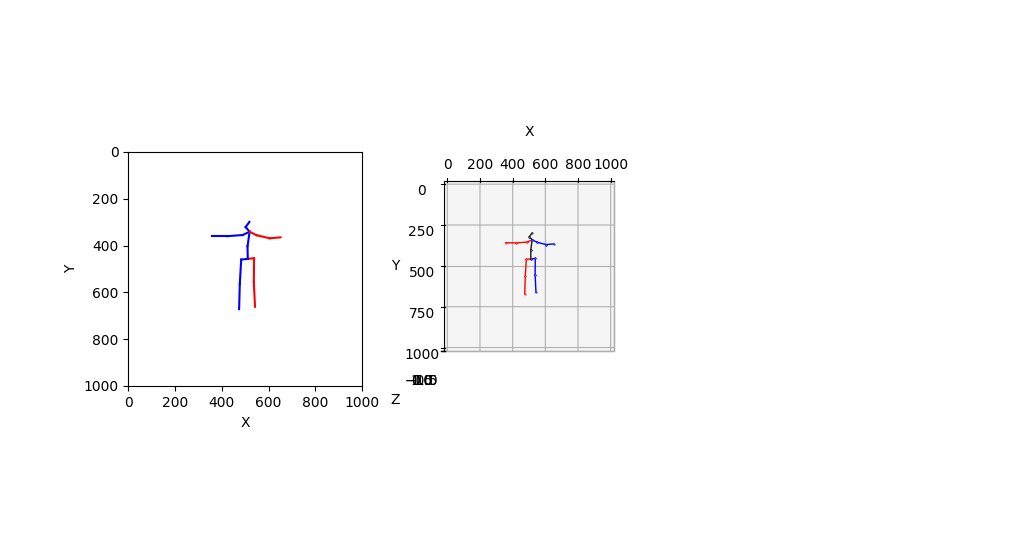

In [72]:
%matplotlib widget
fig = plt.figure(0)
fig.clear()
ax = axes_2d(fig, loc=131, W=W, H=H)
ax2 = axes_3d(fig, loc=132, xlim=(0, W), ylim=(0, H), zlim=(-1, 1), view=(-90, -90))
draw_2d_pose(ax, joint_2d, W=W, H=H)
draw_3d_pose(ax2, joint3d_image)
plt.show()

In [82]:
joint_2ds = {'train': [], 'test': []}
confidences = {'train': [], 'test': []}
joint3d_images = {'train': [], 'test': []}
joints_25d_images = {'train': [], 'test': []}
_25d_factors = {'train': [], 'test': []}
camera_names = {'train': [], 'test': []}
actions = {'train': [], 'test': []}
sources = {'train': [], 'test': []}
frames = {'train': [], 'test': []}
world_3ds = {'train': [], 'test': []}
cam_3ds = {'train': [], 'test': []}
cam_params = {'train': [], 'test': []}

# target 
pkl_folder = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_train_pkl'
#action_list = ['squat', 'pushup', 'kneeup', 'benchpress', 'burpee', 'cat', 'yoga']
test_subject = ['S5', 'S6', 'S7', 'S8']
#camera_list = [1, 2, 3, 4]
# pelvis, r_hip, l_hip, torso, neck, l_shoulder, r_shoulder = 0, 1, 4, 7, 8, 11, 14
# r_knee, r_ankle, l_knee, l_ankle = 2, 3, 5, 6
# l_elbow, l_wrist, r_elbow, r_wrist = 12, 13, 15, 16
# joint_list = [j for j in range(17)] # [r_knee, r_ankle, l_knee, l_ankle, l_elbow, l_wrist, r_elbow, r_wrist] # [j for j in range(17)]
only_test = False

blacklist = []

for item in os.listdir(pkl_folder):
    subject, cam_num, action = item.split('.')[0].split('_') 
    
    # filtering
    #if action not in action_list: continue 
    #if int(cam_num) not in camera_list: continue
    if only_test:
        if subject not in test_subject: continue
    if subject in blacklist: continue
    #print(subject, cam_num, action, phase) 
    
    item_path = os.path.join(pkl_folder, item) 
    data = readpkl(item_path) 
    if subject in test_subject: data_type = 'test' 
    else: data_type = 'train' 

    joint_2ds[data_type] += list(np.array(data['joint_2d'])) 
    confidences[data_type] += list(np.array(data['confidence'])) 
    joint3d_images[data_type] += list(np.array(data['joint3d_image'])) 
    joints_25d_images[data_type] += list(np.array(data['joints_2.5d_image'])) 
    _25d_factors[data_type] += data['2.5d_factor'] 
    camera_names[data_type] += data['camera_name']  
    actions[data_type] += data['action'] 
    sources[data_type] += data['source'] 
    frames[data_type] += data['frame'] 
    world_3ds[data_type] += list(np.array(data['world_3d'])) 
    cam_3ds[data_type] += list(np.array(data['cam_3d']))
    cam_params[data_type] += data['cam_param'] 
    
data_total = {'train': {}, 'test': {}}

for data_type in ['train', 'test']:
    data_total[data_type]['joint_2d']          = copy.deepcopy(np.array(joint_2ds[data_type]))
    data_total[data_type]['confidence']        = copy.deepcopy(np.array(confidences[data_type]))
    data_total[data_type]['joint3d_image']     = copy.deepcopy(np.array(joint3d_images[data_type]))
    data_total[data_type]['joints_2.5d_image'] = copy.deepcopy(np.array(joints_25d_images[data_type]))
    data_total[data_type]['2.5d_factor']       = copy.deepcopy(np.array(_25d_factors[data_type]))
    data_total[data_type]['camera_name']       = copy.deepcopy(np.array(camera_names[data_type]))
    data_total[data_type]['action']            = copy.deepcopy(np.array(actions[data_type]))
    data_total[data_type]['source']            = copy.deepcopy(np.array(sources[data_type]))
    data_total[data_type]['frame']             = copy.deepcopy(np.array(frames[data_type]))
    data_total[data_type]['world_3d']          = copy.deepcopy(np.array(world_3ds[data_type]))
    data_total[data_type]['cam_3d']            = copy.deepcopy(np.array(cam_3ds[data_type]))
    data_total[data_type]['cam_param']         = copy.deepcopy(np.array(cam_params[data_type]))
    
if len(data_total['train']['joint_2d']) == 0:
    data_total['train'] = copy.deepcopy(data_total['test'])

data_total['train']['joint3d_image'].shape, data_total['test']['joint3d_image'].shape  

((248376, 17, 3), (1311376, 17, 3))

In [ ]:
save_path = os.path.join(motionbert_root, f'data/motion3d/h36m_train_s1_test_s5678.pkl')
savepkl(data_total, save_path)